In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


In [2]:
dataset = load_digits()

In [3]:
print(dataset.target.shape)
print(dataset.data.shape)
X=dataset.data
Y=dataset.target


(1797,)
(1797, 64)


7


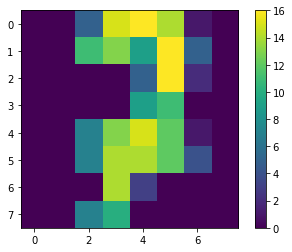

In [4]:
index=783
print(Y[index])
plt.imshow(X[index].reshape(8,8))
plt.colorbar()

In [5]:
X_bar = np.mean(X,axis=0)[None,:] # Sample mean
print(X_bar.shape)
S = np.dot(X.T-X_bar.T , X-X_bar)/len(X) # Compute covariance matrix


(1, 64)


In [6]:
print(S.shape)

(64, 64)


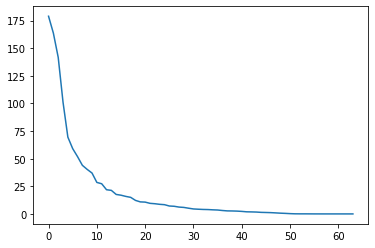

In [7]:
eigenvals,eigenvecs = np.linalg.eig(S)

plt.plot(eigenvals)

In [8]:
M=40
D=64
N=len(X)
U = np.array(eigenvecs) # Columns of U form the principal components.


In [9]:
Z = np.zeros((N,M)) 
b = np.zeros(D)
print(Z.shape)
print(b.shape)

(1797, 40)
(64,)


In [10]:
for n in range(N):
    for i in range(M):
        Z[n,i]= np.dot(X[n],U[:,i])
        
for i in range(M,D):
    b[i] = np.dot(X_bar,U[:,i])
    

In [11]:
# Compression is now done. X_tilde is reconstructed only from Z,b and u now.
print(Z.shape)
print(b.shape)
print(U.shape)

(1797, 40)
(64,)
(64, 64)


In [12]:
# Reconstruct X_tilde

X_tilde = np.zeros(X.shape)

for n in range(N):
    for i in range(M):
        X_tilde[n,:] += Z[n,i]*U[:,i].T
        
    for i in range(M,D):
        X_tilde[n,:] += b[i]*U[:,i].T
        
        
print(X_tilde.shape)
        


(1797, 64)


3


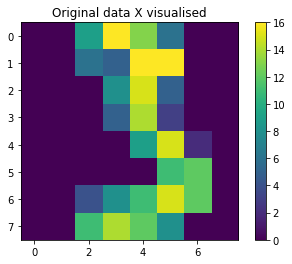

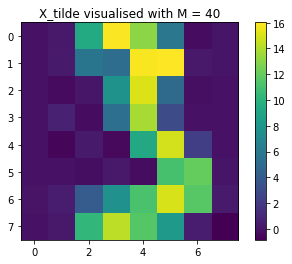

In [13]:
# Comparatively visualise X and X_tilde to see how good the approximation is
index=45
print(Y[index])

plt.figure()
plt.title("Original data X visualised")
plt.imshow(X[index].reshape(8,8))
plt.colorbar()

plt.figure()
plt.title("X_tilde visualised with M = "+str(M))
plt.imshow(X_tilde[index].reshape(8,8))
plt.colorbar()


In [14]:
# Compute average squared distance
avg_sqd_distance = np.sum((X-X_tilde)**2)/len(X)
print(avg_sqd_distance)

14.17416466513978


In [15]:
# Best solution has average squared distance equal to sum of last D-M eigen values of S
np.sum(eigenvals[M:D])

14.174164665139832